In [4]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

import os
from pathlib import Path
import sys
# Set sys path
sys.path.append(str(Path(os.getcwd()).parent))

# Set filpaths for data and figures
notebook_dir = os.getcwd()
file_path = Path(notebook_dir).parent / 'data' 

In [5]:
# load data
df = pd.read_csv(file_path / 'Scivias_neat_proteins.tsv', sep='\t', index_col=0)

# data structure
proteomics data with proteins as columns and samples as rows

In [6]:
df

,A0A075B6H7,A0A075B6H9,A0A075B6I0,A0A075B6I4,A0A075B6I9,A0A075B6J1,A0A075B6J2,A0A075B6J9,A0A075B6K0,A0A075B6K2,...,Q9Y4F1;Q9Y4F1-2,Q9Y4R8,Q9Y5F8;Q9Y5F8-2,Q9Y5R5;Q9Y5R5-3,Q9Y5Y7,Q9Y646,Q9Y694;Q9Y694-2;Q9Y694-3,Q9Y6K5,Q9Y6R7,Q9Y6Z7
P1_A10,6.099405,3.473490,4.990467,3.293644,4.415461,3.241899,NaN,4.657895,NaN,4.661076,...,NaN,4.064940,3.713634,NaN,4.441927,3.657836,NaN,3.280467,4.704481,4.055167
P1_A11,6.075975,3.579373,5.376848,NaN,4.678113,3.462011,NaN,4.876180,NaN,4.994277,...,NaN,4.003366,NaN,NaN,4.493101,3.609455,NaN,NaN,4.810298,4.009022
P1_A12,5.571767,NaN,5.676318,NaN,4.558199,3.775010,NaN,4.755155,NaN,4.982303,...,NaN,4.114773,3.669386,5.794276,4.464050,3.665129,NaN,NaN,4.474960,4.022598
P1_A01,5.466762,3.716167,5.462600,3.337258,4.748381,NaN,NaN,4.823796,NaN,NaN,...,NaN,3.632447,NaN,NaN,4.296261,3.608215,NaN,3.306739,4.572428,4.114752
P1_A02,5.632274,3.733375,5.661081,3.841275,4.633648,3.826022,NaN,4.949553,NaN,4.585556,...,NaN,3.860789,NaN,NaN,4.550412,3.620635,NaN,3.479467,4.807658,3.968436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P14_H12,5.879689,3.399468,5.303552,3.527535,4.626730,3.550400,NaN,4.868401,2.909981,4.871739,...,NaN,4.089494,NaN,NaN,4.433053,3.582201,NaN,NaN,4.644392,4.044378
P14_H01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P14_H02,5.458333,NaN,5.049964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P14_H04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data exploration - understanding the data

plot histogram of protein A0A075B6H7

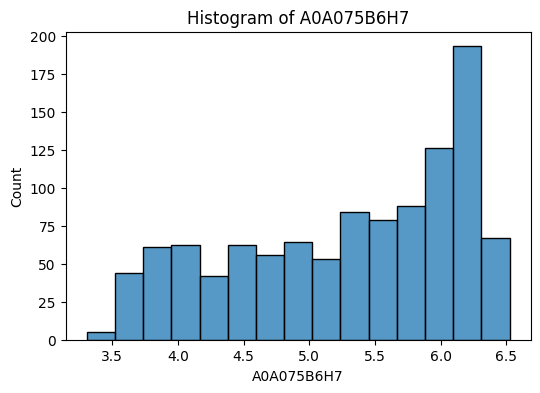

In [8]:
plt.figure(figsize=(6, 4))
sns.histplot(df['A0A075B6H7'], bins=15, kde=False)
plt.title('Histogram of A0A075B6H7')
plt.xlabel('A0A075B6H7')
plt.ylabel('Count')
plt.show()

plot histogram of sample P1_A10

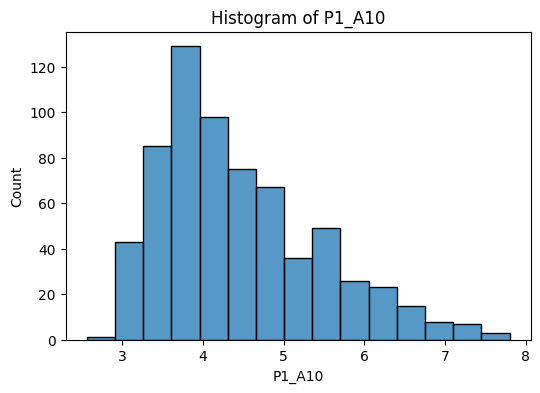

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(df.T['P1_A10'], bins=15, kde=False)
plt.title('Histogram of P1_A10')
plt.xlabel('P1_A10')
plt.ylabel('Count')
plt.show()

change color to red

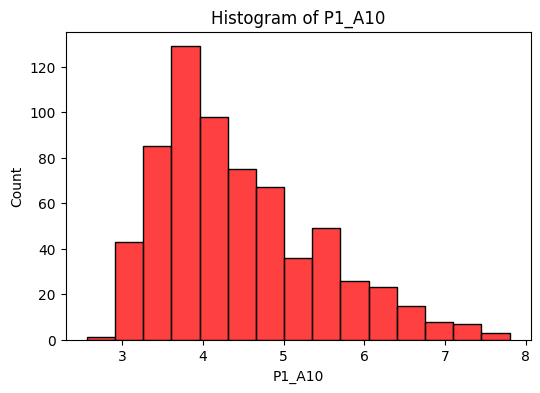

In [ ]:
... your code here ...

# overlaying histograms

1. manipulate data: bring to long format

In [26]:
df_long = df.iloc[:,:3].reset_index().melt(
    id_vars=['index'], var_name='variable', value_name='value'
    )

In [27]:
df_long

,index,variable,value
0,P1_A10,A0A075B6H7,6.099405
1,P1_A11,A0A075B6H7,6.075975
2,P1_A12,A0A075B6H7,5.571767
3,P1_A01,A0A075B6H7,5.466762
4,P1_A02,A0A075B6H7,5.632274
...,...,...,...
3814,P14_H12,A0A075B6I0,5.303552
3815,P14_H01,A0A075B6I0,NaN
3816,P14_H02,A0A075B6I0,5.049964
3817,P14_H04,A0A075B6I0,NaN


2. plot

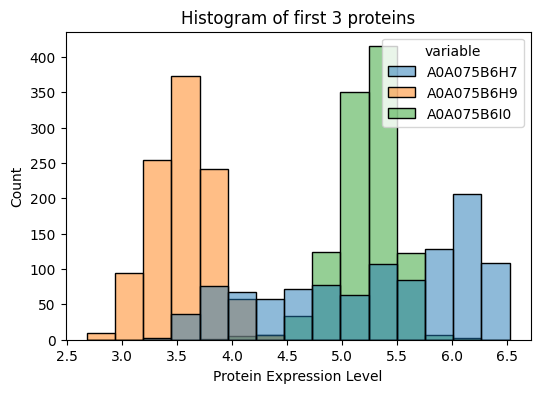

In [33]:
plt.figure(figsize=(6, 4))
sns.histplot(df_long, x='value', hue='variable', bins=15, kde=False)
plt.title('Histogram of first 3 proteins')
plt.xlabel('Protein Expression Level')
plt.ylabel('Count')
plt.show()

do the same as a boxplot

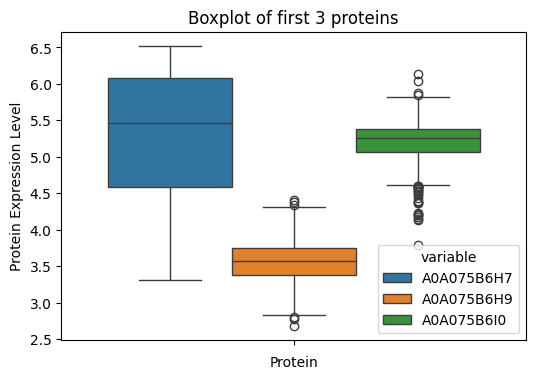

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(df_long, y='value', hue='variable')
plt.title('Boxplot of first 3 proteins')
plt.ylabel('Protein Expression Level')
plt.xlabel('Protein')
plt.show()

change style with a little help...

C:\Users\jomueller\AppData\Local\Temp\ipykernel_82340\3424423794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jomueller\AppData\Local\Temp\ipykernel_82340\3424423794.py:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.boxplot(


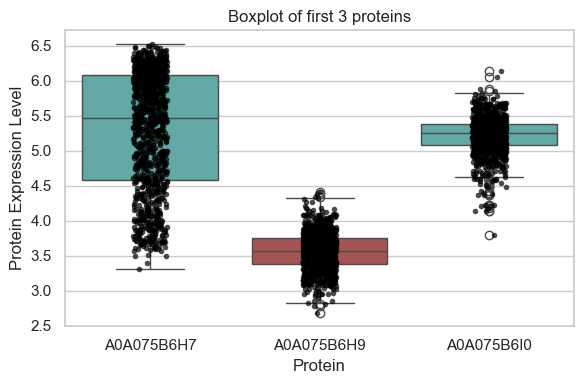

In [37]:
# Optional: Set style and palette similar to the image
sns.set(style="whitegrid")
palette = ["#56B4AE", "#B24747", "#56B4AE", "#56B4AE"]  # Custom colors, adjust as needed

plt.figure(figsize=(6, 4))

# Boxplot with means shown as dashed lines
sns.boxplot(
    data=df_long, 
    x='variable', 
    y='value', 
    palette=palette, 
    showmeans=True,
    meanline=False,
    meanprops={
        "linestyle": "--", 
        "color": "black"
    }
)

# Overlay stripplot (individual data points)
sns.stripplot(
    data=df_long, 
    x='variable', 
    y='value', 
    color='black', 
    size=4, 
    jitter=True, 
    dodge=True, 
    alpha=0.7
)

# Labels in German, like in the image
plt.title('Boxplot of first 3 proteins')
plt.ylabel('Protein Expression Level')
plt.xlabel('Protein')
plt.tight_layout()
plt.show()